###### link Kaggle Bałanda  
https://www.kaggle.com/twistplot/cs-go-competitive-scene-insights-match-prediction



###### pełny tutorial  
https://zablo.net/blog/post/twitter-sentiment-analysis-python-scikit-word2vec-nltk-xgboost  

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/  



# Sentiment analysis on Twitter data - word embeddings, pre-trained models, GloVe, fastText, Keras

1. Project description  
1.1. Introduction  
1.2. Abstract  


2. Exploratory Data Analysis  
2.1.  Loading data - NLTK's twitter corpus  
2.2.  Tokenization


    - data loading
    - data distribution
    - missing values
    - statistical data


3. Data Preprocessing (Feature engineering)
    - data cleaning
    - stemming, stopword removal
    - count vectorizer
    - word list


4. Data visualization
    - word cloud  
    

5. Simple 'classic model' for sentiment analysis using NLTK  
albo LSTM  
https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras



6. Finding baseline
    - TextBlob (out-of-the-box sentiment analysis tool)


7. Sentiment Analysis using pre-trained models in Keras
    - embeddings GloVe
    - fastText (Facebook)  (performance vs accuracy)


8. Summary
  

## 1. Project description  

### 1.1.  Introduction

  

Text-based communication has become one of the most common forms of expression. We email, text message, tweet, and update our statuses on a daily basis. As a result, unstructured text data has become extremely common, and analyzing large quantities of text data is now a key way to understand what people are thinking.

Tweets on Twitter help us find trending news topics in the world. Reviews on Amazon help users purchase the best-rated products. These examples of organizing and structuring knowledge represent **Natural Language Processing (NLP)** tasks.

NLP is a field of computer science that focuses on the interaction between computers and humans. NLP techniques are used to analyze text, providing a way for computers to understand human language. A few examples of NLP applications include automatic summarization, topic segmentation, and **sentiment analysis**.

### 1.2.  Abstract

The goal of this project is to predict sentiment for the given Twitter post using Python. Sentiment analysis can predict many different emotions attached to the text.


**Sentiment Analysis:** the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

In this project only 2 major are considered: positive and negative. The training dataset is small, 10000 examples (5000 for each group).  

*After creating a lot of custom features, utilizing both bag-of-words and word2vec representations and applying the Extreme Gradient Boosting algorithm, the classification accuracy at level of 58% was achieved.*


## 2. Exploratory Data Analysis  

https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fbn 

https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb  

https://medium.com/coinmonks/solving-twitter-sentiment-analysis-problem-on-analytics-vidhya-ea3e51eea521   

https://www.digitalocean.com/community/tutorials/how-to-work-with-language-data-in-python-3-using-the-natural-language-toolkit-nltk  





#### Importing libraries

import pandas as pd  
import numpy as np  
import nltk  
import matplotlib.pyplot as plt  
from bs4 import BeautifulSoup  
from nltk.tokenize import WordPunctTokenizer, TweetTokenizer  
import re  
from wordcloud import WordCloud  
from os import path  
from PIL import Image  
from sklearn.feature_extraction.text import CountVectorizer  


### 2.1.  Loading data - NLTK's twitter corpus

In this project, I will use a Twitter corpus that can be downloaded through NLTK. Natural Language Toolkit (NLTK) Twitter corpus currently contains a sample of 20k Tweets (named 'twitter_samples') retrieved from the Twitter Streaming API, together with another 10k which are divided according to sentiment into negative and positive.
Full tweets are stored as line-separated JSON.   
The NLTK's twitter_samples corpus can be downloaded through the command line.

In [1]:
import nltk
from nltk.corpus import twitter_samples
nltk.download('twitter_samples', download_dir='./data')


#We can see how many JSON files exist in the corpus using the twitter_samples.fileids() method:
twitter_samples.fileids()

[nltk_data] Downloading package twitter_samples to ./data...
[nltk_data]   Package twitter_samples is already up-to-date!


['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

**Show Tweets' data**

In [2]:
import pandas as pd


# show negative tweets
# temporarily display all columns in the data set 
with pd.option_context('display.max_rows', 4, 'display.max_columns', 99):
    display(pd.read_json('data/corpora/twitter_samples/negative_tweets.json', lines=True))

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,truncated,user
0,NaN,None,2015-07-24 10:42:49,"{'hashtags': [], 'user_mentions': [], 'urls': ...",0,False,None,624530164626534400,624530164626534400,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,NaN,NaN,NaN,0,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",hopeless for tmr :(,False,"{'screen_name': 'yuwraxkim', 'time_zone': 'Jak..."
1,NaN,None,2015-07-24 10:42:48,"{'hashtags': [], 'user_mentions': [], 'urls': ...",0,False,None,624530162890219521,624530162890219520,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Everything in the kids section of IKEA is so c...,False,"{'screen_name': 'EveHollyHousley', 'time_zone'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,NaN,None,2015-07-24 09:49:38,"{'hashtags': [], 'user_mentions': [], 'urls': ...",2,False,None,624516784226340864,624516784226340864,None,NaN,NaN,NaN,NaN,True,en,"{'iso_language_code': 'en', 'result_type': 're...",None,0.0,"{'contributors': None, 'coordinates': None, 't...",6.244883e+17,6.244883e+17,0,False,"<a href=""http://twitter.com/download/android"" ...",But but Mr Ahmad Maslan cooks too :( https://t...,False,"{'screen_name': 'syafiqqah', 'time_zone': 'Kua..."
4999,NaN,None,2015-07-24 09:49:38,"{'hashtags': [], 'user_mentions': [{'id_str': ...",0,False,None,624516782557151232,624516782557151232,eawoman,6.245120e+17,6.245120e+17,289534486.0,289534486.0,False,en,"{'iso_language_code': 'en', 'result_type': 're...","{'place_type': 'city', 'full_name': 'Leeds, En...",NaN,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",@eawoman As a Hull supporter I am expecting a ...,False,"{'screen_name': 'AndrewByrom1', 'time_zone': N..."


In [3]:
# show positive tweets
# temporarily display all columns in the data set 
with pd.option_context('display.max_rows', 4, 'display.max_columns', 99):
    display(pd.read_json('data/corpora/twitter_samples/positive_tweets.json', lines=True))

,contributors,coordinates,created_at,entities,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata,place,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,truncated,user
0,NaN,None,2015-07-24 08:23:36,"{'hashtags': [{'indices': [0, 13], 'text': 'Fo...",0,False,None,624495129303351296,624495129303351296,None,NaN,NaN,NaN,NaN,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,NaN,NaN,NaN,0,False,"<a href=""https://commun.it"" rel=""nofollow"">Com...",#FollowFriday @France_Inte @PKuchly57 @Milipol...,False,"{'time_zone': 'Paris', 'profile_background_ima..."
1,NaN,None,2015-07-24 08:23:35,"{'hashtags': [], 'user_mentions': [{'screen_na...",0,False,None,624495128510656513,624495128510656512,Lamb2ja,6.243353e+17,6.243353e+17,1.945884e+07,1.945884e+07,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@Lamb2ja Hey James! How odd :/ Please call our...,False,"{'time_zone': 'London', 'profile_background_im..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,NaN,None,2015-07-24 08:11:16,{'media': [{'media_url': 'http://pbs.twimg.com...,0,False,None,624492027107868672,624492027107868672,staybubbly69,NaN,NaN,3.138322e+09,3.138322e+09,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,0.0,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@staybubbly69 as Matt would say. WELCOME TO AD...,False,"{'time_zone': None, 'profile_background_image_..."
4999,NaN,None,2015-07-24 08:11:16,"{'hashtags': [], 'user_mentions': [{'screen_na...",0,False,None,624492026386624512,624492026386624512,DanielOConnel18,6.244918e+17,6.244918e+17,5.580347e+08,5.580347e+08,False,en,"{'iso_language_code': 'en', 'result_type': 're...",None,NaN,NaN,NaN,NaN,0,False,"<a href=""https://about.twitter.com/products/tw...",@DanielOConnel18 you could say he will have eg...,False,"{'time_zone': 'Edinburgh', 'profile_background..."


In [4]:
pd.read_json('data/corpora/twitter_samples/positive_tweets.json', lines=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
contributors                 0 non-null float64
coordinates                  27 non-null object
created_at                   5000 non-null datetime64[ns]
entities                     5000 non-null object
favorite_count               5000 non-null int64
favorited                    5000 non-null bool
geo                          27 non-null object
id                           5000 non-null int64
id_str                       5000 non-null int64
in_reply_to_screen_name      2957 non-null object
in_reply_to_status_id        2453 non-null float64
in_reply_to_status_id_str    2453 non-null float64
in_reply_to_user_id          2957 non-null float64
in_reply_to_user_id_str      2957 non-null float64
is_quote_status              5000 non-null bool
lang                         5000 non-null object
metadata                     5000 non-null object
place                        261 non-null ob

As we can see positive and negative tweets data have 5000 examples each. There are many unnecessary columns in the data which will not provide any usefull information regarding to sentiment analysis.  
Therefore it is more practical to focus just on the text field of the Tweets.

In [5]:
strings = twitter_samples.strings('positive_tweets.json')
for string in strings[:5]:
    print(string)

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
@97sides CONGRATS :)
yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days


In [6]:
# there are 2 seperate files for negative and positive tweets
df_neg = pd.read_json('data/corpora/twitter_samples/negative_tweets.json', lines=True)
df_neg['target'] = 0   # new column for negative sentiment, value 0
df_pos = pd.read_json('data/corpora/twitter_samples/positive_tweets.json', lines=True)
df_pos['target'] = 1   # new column for positive sentiment, value 1

#joining positive and negative tweets
df = pd.concat([df_neg, df_pos]).reset_index(drop=True)

In [7]:
df['text'].head()

0                                  hopeless for tmr :(
1    Everything in the kids section of IKEA is so c...
2    @Hegelbon That heart sliding into the waste ba...
3    “@ketchBurning: I hate Japanese call him "bani...
4             Dang starting next week I have "work" :(
Name: text, dtype: object

In [8]:
df['text'].tail()

9995    @chriswiggin3 Chris, that's great to hear :) D...
9996    @RachelLiskeard Thanks for the shout-out :) It...
9997              @side556 Hey!  :)  Long time no talk...
9998    @staybubbly69 as Matt would say. WELCOME TO AD...
9999    @DanielOConnel18 you could say he will have eg...
Name: text, dtype: object

In [9]:
import matplotlib.pyplot as plt

# show length of tweets
plt.boxplot(df.text.str.len())
plt.title("Tweets' length")
plt.ylabel("Number of characters")
plt.xticks([])
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
df.target.value_counts()

1    5000
0    5000
Name: target, dtype: int64

In [11]:
pd.DataFrame(df.text[df.text.str.len() > 140].str.len().value_counts())\
            .reset_index().rename(columns={'index': 'tweets\' length', 'text': 'count'})
# checking the length of long tweets

,tweets' length,count
0,144,17
1,143,15
2,142,12
3,141,8
4,147,3
5,145,2
6,152,1
7,151,1
8,148,1
9,146,1


## Data cleaning  

https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90  



Data Preparation 1: HTML decoding  
Data Preparation 2: ‘@’mention  
Data Preparation 3: URL links  
Data Preparation 4: UTF-8 BOM (Byte Order Mark)  
Data Preparation 5: hashtag / numbers  

### data preprocessing

Preprocessing steps

The targed of the following preprocessing is to create a Bag-of-Words representation of the data. The steps will execute as follows:

   https://zablo.net/blog/post/twitter-sentiment-analysis-python-scikit-word2vec-nltk-xgboost  
   
   
   Cleansing  
        Remove URLs  
        Remove usernames (mentions)  
        Remove tweets with Not Available text  
        Remove special characters  
        Remove numbers  
    Text processing  
        Tokenize  
        Transform to lowercase  
        Stem  
    Build word list for Bag-of-Words  



In this kernel I want to illustrate how I do come up with meaningful preprocessing when building deep learning NLP models.

I start with two golden rules:

**Don't use standard preprocessing steps like stemming or stopword removal when you have pre-trained embeddings**

Some of you might used standard preprocessing steps when doing word count based feature extraction (e.g. TFIDF) such as removing stopwords, stemming etc. The reason is simple: You loose valuable information, which would help your NN to figure things out.

    Get your vocabulary as close to the embeddings as possible


In [12]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re


# twt_clean_emoji


tokenizer = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'  #  @replies
pat2 = r'https?://[^ ]+'  #   links
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
#     letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tokenizer.tokenize(neg_handled) if len(x) > 0]
    return (" ".join(words)).strip()


twt_clean_emoji = []
for t in df.text:
    twt_clean_emoji.append(tweet_cleaner(t))

#### Saving preprocessed tweets as csv

#### I decided to only do sentiment analysis on this dataset, therfore I dropped the unnecessary colunns, keeping only sentiment and text.


In [13]:
# saving clean tweets to file

twt_orig = df[['text', 'target']]
twt_orig.to_csv('data/twt_orig.csv',encoding='utf-8')

twt_clean_emoji = pd.DataFrame(twt_clean_emoji,columns=['text'])
twt_clean_emoji['target'] = df.target
twt_clean_emoji.to_csv('data/twt_clean_emoji.csv',encoding='utf-8')


#### Comparing results of preprocessing

Result after cleaning and processing

#### **compared to original Tweets (below) we can see, that there are some elements removed, but emoticons are left intact**

In [14]:
# non-standard-text tweet's list, with emos, links, hashtags, etc.
twt_no = (9,89,188,286,337,338,9464,9852)

print('Before preprocessing')
print('='*30,'\n')
for i in twt_no:
    print (twt_orig.text[i])
print('\n\nAfter preprocessing')
print('='*30,'\n')
for i in twt_no:
    print (twt_clean_emoji.text[i])

Before preprocessing

Athabasca glacier was there in #1948 :-( #athabasca #glacier #jasper #jaspernationalpark #alberta #explorealberta #… http://t.co/dZZdqmf7Cz
@LittleMix French mixers miss you so much :( 💜
Raining on me today :( 

Gym it is then 💪🏻🐒
My last cross country in IJ was amazing!!!!!!!💥✨💫 Can't bear to leave :-( https://t.co/VkVOxIaEQn
@bmthofficial ITS SOLD OUT :((((((((((((((((((((((((((((((((((((((((((((((((((((((((((
i hate u &gt;.&lt; &gt;:( #H_My_King
@JLo HAPPY BIRTHDAY TOO YOU! Best wishes from Dresden/Germany :). LOVE YOU &lt;3 &lt;3 &lt;3 &lt;3

(Please share this) http://t.co/EByoLHnnOI
@SivaKaneswaran  Happy Birthday 🎂  @JayMcGuiness  #Jiva for ever :) 🍹🍸🍻


After preprocessing

athabasca glacier was there in # 1948 :-( # athabasca # glacier # jasper # jaspernationalpark # alberta # explorealberta #…
french mixers miss you so much :( 💜
raining on me today :( gym it is then 💪🏻🐒
my last cross country in ij was amazing !!!!!!!💥✨💫 can not bear to leave :-(
its sold

##  2.2. Data visualization (wordcloud)

##### Positive tweets wordcloud  
Are generated from original Tweets

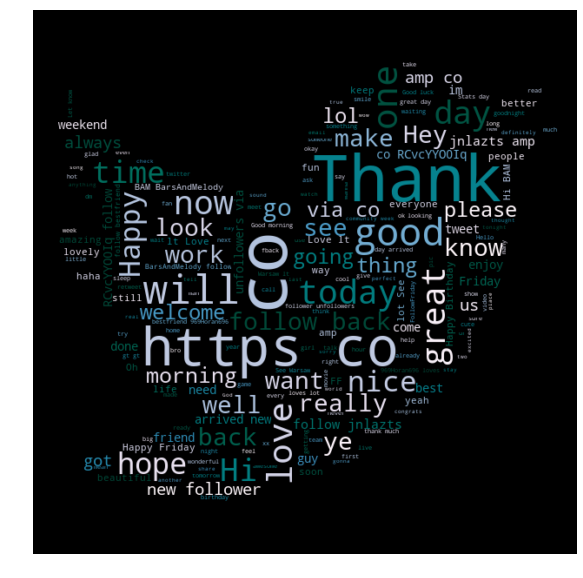

In [15]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt



pos_tweets = twitter_samples.strings('positive_tweets.json')

pos_string = []
for t in pos_tweets:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

mask = np.array(Image.open( "data/twitter_logo.jpg"))
wordcloud = WordCloud(background_color='black',max_font_size=80, min_font_size=6, colormap='PuBuGn', mask=mask).generate(pos_string)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Negative tweets wordcloud  


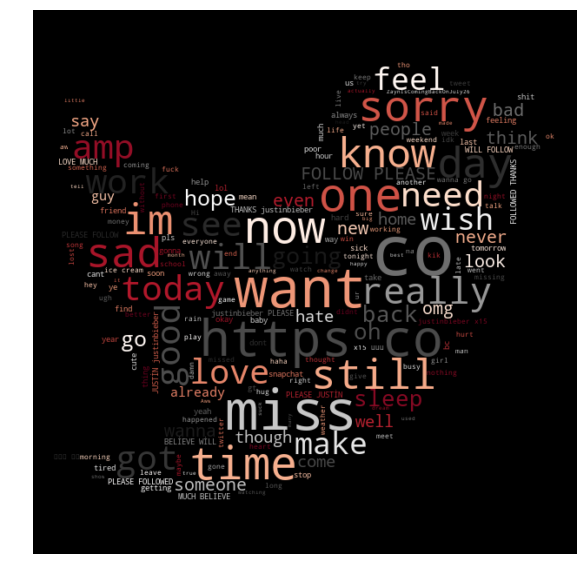

In [16]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt


neg_tweets = twitter_samples.strings('negative_tweets.json')

neg_string = []
for t in neg_tweets:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

mask = np.array(Image.open( "data/twitter_logo.jpg"))
wordcloud = WordCloud(background_color='black',max_font_size=80, min_font_size=6, colormap='RdGy', mask=mask).generate(neg_string)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###### WordCloud images are generated from original Tweets.

# Count Vectorizer
##### number of features

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


#  pre-processed tweets with emoji's
cv = CountVectorizer()
cv.fit(twt_clean_emoji.text)

# original tweets
cv2 = CountVectorizer()
cv2.fit(twt_orig.text)

print('Number of features')
print('preprocessed tweets: ', len(cv.get_feature_names()))
print('original tweets: ', len(cv2.get_feature_names()))

Number of features
preprocessed tweets:  12038
original tweets:  20770


#### most common words in both classes (preprocessed tweets with emoijs)

In [18]:
# tf  df 
neg_doc_matrix = cv.transform(twt_clean_emoji[twt_clean_emoji.target == 0].text)
pos_doc_matrix = cv.transform(twt_clean_emoji[twt_clean_emoji.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cv.get_feature_names()).transpose()
# term_freq_df/
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
you,803,1591,2394
to,1098,1093,2191
the,918,1086,2004
and,718,707,1425
it,683,680,1363
my,743,556,1299
not,914,361,1275
for,406,771,1177
me,699,359,1058
is,509,437,946


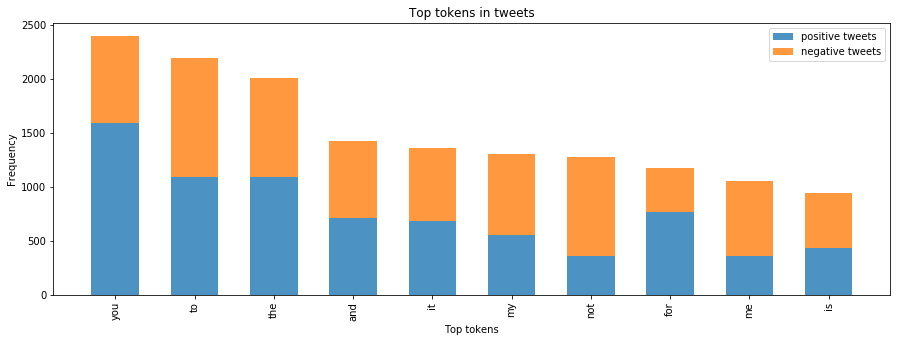

In [19]:
N = 10
positive = term_freq_df.sort_values(by='total', ascending=False)['positive'][:N]
negative = term_freq_df.sort_values(by='total', ascending=False)['negative'][:N]
y_pos = np.arange(N)
plt.figure(figsize=(15,5))
plt.bar(y_pos, positive, width=0.6, align='center', alpha=0.8, label='positive tweets')
plt.bar(y_pos, negative, width=0.6, align='center', alpha=0.8, label='negative tweets', bottom = positive)
plt.xticks(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:N].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top tokens')
plt.title('Top tokens in tweets')
plt.legend(loc='best')
plt.show()

#### As we can see most common stop words appear to be in simmilar amount in positive and negative classes in simmilar proportion

# Stop words

presentetian of most common words, with stop words removed. For building models I will **NOT remove** stop words, as they can provide some information for NN models with embedings

However, when we remove stop words we will see some characterictic words bor both classes (negative and positive)

###### most common tokens used in 'total' in tweets (stop words removed)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# removing STOP WORDS
cv = CountVectorizer(stop_words='english')
cv.fit(twt_clean_emoji.text)


# tf
neg_doc_matrix = cv.transform(twt_clean_emoji[twt_clean_emoji.target == 0].text)
pos_doc_matrix = cv.transform(twt_clean_emoji[twt_clean_emoji.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cv.get_feature_names()).transpose()
# term_freq_df/
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:15]

,negative,positive,total
thanks,77,390,467
follow,142,308,450
just,238,197,435
like,206,219,425
love,133,275,408
good,99,235,334
day,96,212,308
want,218,74,292
know,131,148,279
thank,28,246,274


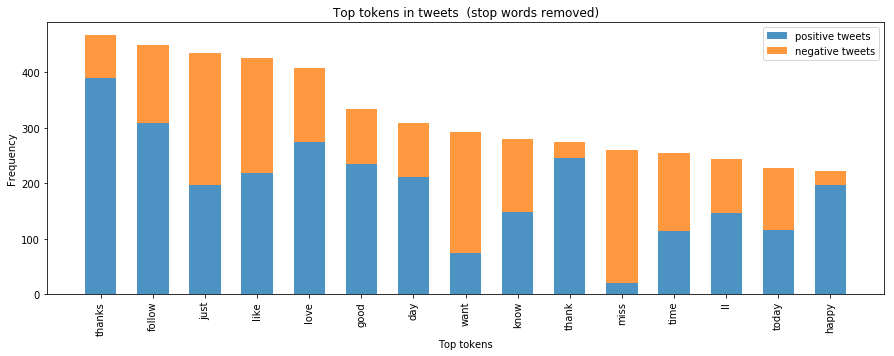

In [21]:
N = 15
positive = term_freq_df.sort_values(by='total', ascending=False)['positive'][:N]
negative = term_freq_df.sort_values(by='total', ascending=False)['negative'][:N]
y_pos = np.arange(N)
plt.figure(figsize=(15,5))
plt.bar(y_pos, positive, width=0.6, align='center', alpha=0.8, label='positive tweets')
plt.bar(y_pos, negative, width=0.6, align='center', alpha=0.8, label='negative tweets', bottom = positive)
plt.xticks(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:N].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top tokens')
plt.title('Top tokens in tweets  (stop words removed)')
plt.legend(loc='best')
plt.show()

### Positive tweets

###### most common tokens in positive tweets' (stop words removed)

Text(0.5, 1.0, 'Top 20 tokens in positive tweets, with stop words removed')

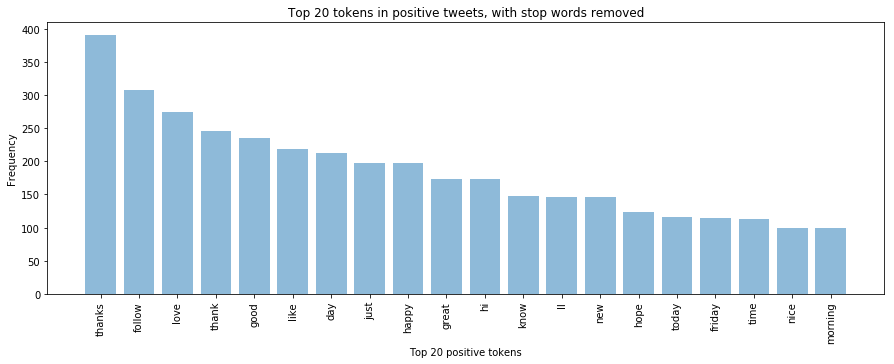

In [22]:
y_pos = np.arange(20)
plt.figure(figsize=(15,5))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 positive tokens')
plt.title('Top 20 tokens in positive tweets, with stop words removed')


###### WordCloud images are generated from original Tweets.

### Negative tweets

###### most common tokens in negative tweets' (stop words removed)

Text(0.5, 1.0, 'Top 20 tokens in negative tweets, with stop words removed')

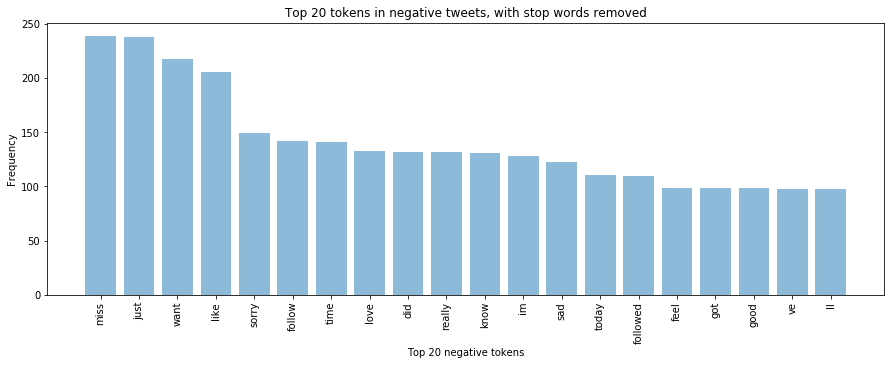

In [23]:
y_pos = np.arange(20)
plt.figure(figsize=(15,5))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:20], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:20].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 20 negative tokens')
plt.title('Top 20 tokens in negative tweets, with stop words removed')


# Model comparison

### Train / Dev / Test Split   

- Baseline - TextBlob
- Bigram



First of all, splitting the dataset into a training and a testing set. The test set is the 30% of the original dataset. For this particular analysis my goal is to differentiate positive and negative tweets.


In [50]:
# original tweets before preprocessing
# X = twt_orig.text
# y = twt_orig.target

# preprocessed tweets with stop words NOT removed
X = twt_clean_emoji.text
y = twt_clean_emoji.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    random_state=123)

In [51]:
print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
               (len(x_train[y_train == 0]) / (len(x_train)*1.))*100, 
               (len(x_train[y_train == 1]) / (len(x_train)*1.))*100))

Train set has total 7000 entries with 50.21% negative, 49.79% positive


### 6. Finding baseline
    - TextBlob (out-of-the-box sentiment analysis tool)

## TextBlob  (Accuracy Score: 95.50%)
TextBlob is a python library for processing textual data. Apart from other useful tools such as POS tagging, n-gram, **The package has built-in sentiment classification**. This is a so-called out-of-the-box sentiment analysis tool, and in addition to the null accuracy, I will also keep in mind of the accuracy I get from TextBlob sentiment analysis to see how my model is performing.

In [52]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


tbresult = [TextBlob(i).sentiment.polarity for i in x_test]
tbpred = [0 if n < 0 else 1 for n in tbresult]
conmat = np.array(confusion_matrix(y_test, tbpred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['positive', 'negative'],
                         columns=['predicted_positive','predicted_negative'])

print ("Accuracy Score: {0:.2f}%".format(accuracy_score(y_test, tbpred)*100))
print ("-"*80)
print ("Confusion Matrix\n")
print (confusion)
print ("-"*80)
print ("Classification Report\n")
print (classification_report(y_test, tbpred))

Accuracy Score: 95.50%
--------------------------------------------------------------------------------
Confusion Matrix

          predicted_positive  predicted_negative
positive                1475                  40
negative                  95                1390
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1485
           1       0.94      0.97      0.96      1515

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.96      0.95      0.95      3000
weighted avg       0.96      0.95      0.95      3000



## Logistic regression


In [84]:
%%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_tfidf, y_train)

print(clf.score(x_train_tfidf, y_train))
print(clf.score(x_test_tfidf, y_test))

/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9537142857142857
0.7736666666666666
CPU times: user 1.6 s, sys: 7.96 ms, total: 1.61 s
Wall time: 785 ms


## Algorithms Comparison  (ensemble (voting) classifier with top 5 models)  


In [85]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer



names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print ("Validation result for {}".format(n))
        print (c)
        clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,clf_accuracy))
    return result

trigram_result = classifier_comparator(n_features=10000,ngram_range=(1,3))
print('\nClassifier comparison for TRIGRAM')
pd.DataFrame(trigram_result)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


null accuracy: 50.50%
accuracy score: 76.90%
model is 26.40% more accurate than null accuracy
train and test time: 0.46s
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
null accuracy: 50.50%
accuracy score: 75.73%
model is 25.23% more accurate than null accuracy
train and test time: 0.48s
--------------------------------------------------------------------------------
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
  

/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.50%
accuracy score: 73.97%
model is 23.47% more accurate than null accuracy
train and test time: 0.45s
--------------------------------------------------------------------------------
Validation result for Passive-Aggresive
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)


/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.50%
accuracy score: 74.93%
model is 24.43% more accurate than null accuracy
train and test time: 0.45s
--------------------------------------------------------------------------------
Validation result for Nearest Centroid
NearestCentroid(metric='euclidean', shrink_threshold=None)
null accuracy: 50.50%
accuracy score: 74.07%
model is 23.57% more accurate than null accuracy
train and test time: 0.44s
--------------------------------------------------------------------------------

Classifier comparison for TRIGRAM


,0,1
0,Logistic Regression,0.769000
1,Linear SVC,0.757333
2,LinearSVC with L1-based feature selection,0.766667
3,Multinomial NB,0.775667
4,Bernoulli NB,0.761333
5,Ridge Classifier,0.763333
6,AdaBoost,0.690333
7,Perceptron,0.739667
8,Passive-Aggresive,0.749333
9,Nearest Centroid,0.740667


### VotingClassifier

In [74]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(max_features=8000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
clf_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
Validation result for Multinomial NB
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Validation result for Ridge Classifier
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)
Validation result for Passive Aggresive Classifier
PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early

/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


null accuracy: 50.50%
accuracy score: 76.27%
model is 25.77% more accurate than null accuracy
train and test time: 0.58s
--------------------------------------------------------------------------------


## Tfidf Vectorizer

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Validation result for 2000 features
null accuracy: 50.50%
accuracy score: 76.37%
model is 25.87% more accurate than null accuracy
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.50%
accuracy score: 76.43%
model is 25.93% more accurate than null accuracy
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result for 6000 features
null accuracy: 50.50%
accuracy score: 76.60%
model is 26.10% more accurate than null accuracy
train and test time: 0.14s
--------------------------------------------------------------------------------
Validation result fo

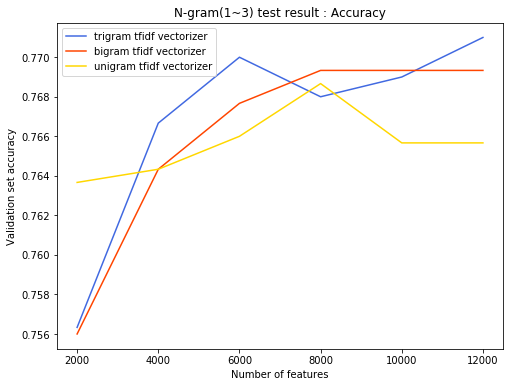

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(2000,12001,2000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy,tt_time))
    return result

from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))


nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
# plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
# plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
# plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

# Doc2Vec

In [75]:

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
import multiprocessing
from sklearn import utils

def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(LabeledSentence(t.split(), [prefix + '_%s' % i]))
    return result
  
all_x = pd.concat([x_train,x_test])
all_x_w2v = labelize_tweets_ug(all_x, 'all')


from sklearn.linear_model import LogisticRegression

cores = multiprocessing.cpu_count()
model_ug_dbow = Doc2Vec(dm=0, size=100, negative=5, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_dbow.build_vocab([x for x in tqdm(all_x_w2v)])

for epoch in range(30):
    model_ug_dbow.train(utils.shuffle([x for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_dbow.alpha -= 0.002
    model_ug_dbow.min_alpha = model_ug_dbow.alpha
    
def get_vectors(model, corpus, size):
    vecs = np.zeros((len(corpus), size))
    n = 0
    for i in corpus.index:
        prefix = 'all_' + str(i)
        vecs[n] = model.docvecs[prefix]
        n += 1
    return vecs
  
train_vecs_dbow = get_vectors(model_ug_dbow, x_train, 100)
validation_vecs_dbow = get_vectors(model_ug_dbow, x_test, 100)

clf = LogisticRegression()
clf.fit(train_vecs_dbow, y_train)
clf.score(validation_vecs_dbow, y_test)

/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  del sys.path[0]
/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 10000/10000 [00:00<00:00, 2301275.10it/s]
/home/gt/anaconda3/envs/p36tfgpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.941

## Neural Networks -  RNN (LSTM)

### 5. Simple 'classic model' for sentiment analysis using NLTK  

https://github.com/nagypeterjob/Sentiment-Analysis-NLTK-ML-LSTM  
https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras  


albo LSTM  
https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras



albo Naive BAyes  

https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-two-3ed2670f927d

### 7. Sentiment Analysis using pre-trained models in Keras
    - embeddings GloVe
    - fastText (Facebook)  (performance vs accuracy)

### 8. Summary
  

# LSTM Sentiment Analysis | Keras   
https://www.kaggle.com/ngyptr/lstm-sentiment-analysis-keras

In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

X = twt_clean_emoji.text
y = twt_clean_emoji.target

In [114]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(twt_clean_emoji.text.values)
X = tokenizer.texts_to_sequences(twt_clean_emoji.text.values)
X = pad_sequences(X)

In [115]:
X.shape

(10000, 32)

In [116]:


embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 32, 128)           256000    
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 32, 128)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [117]:
Y = pd.get_dummies(twt_clean_emoji.target).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(6700, 32) (6700, 2)
(3300, 32) (3300, 2)


In [118]:


batch_size = 32
model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)



Epoch 1/25
 - 11s - loss: 0.5577 - acc: 0.6999
Epoch 2/25
 - 11s - loss: 0.4158 - acc: 0.8058
Epoch 3/25
 - 11s - loss: 0.3639 - acc: 0.8334
Epoch 4/25
 - 11s - loss: 0.3218 - acc: 0.8578
Epoch 5/25
 - 11s - loss: 0.2920 - acc: 0.8707
Epoch 6/25
 - 11s - loss: 0.2635 - acc: 0.8899
Epoch 7/25
 - 11s - loss: 0.2384 - acc: 0.9001
Epoch 8/25
 - 11s - loss: 0.2185 - acc: 0.9031
Epoch 9/25
 - 11s - loss: 0.2003 - acc: 0.9166
Epoch 10/25
 - 11s - loss: 0.1832 - acc: 0.9225
Epoch 11/25
 - 11s - loss: 0.1731 - acc: 0.9261
Epoch 12/25
 - 11s - loss: 0.1603 - acc: 0.9337
Epoch 13/25
 - 11s - loss: 0.1454 - acc: 0.9384
Epoch 14/25
 - 11s - loss: 0.1427 - acc: 0.9387
Epoch 15/25
 - 11s - loss: 0.1278 - acc: 0.9497
Epoch 16/25
 - 11s - loss: 0.1168 - acc: 0.9512
Epoch 17/25
 - 11s - loss: 0.1168 - acc: 0.9522
Epoch 18/25
 - 10s - loss: 0.1096 - acc: 0.9549
Epoch 19/25
 - 11s - loss: 0.1053 - acc: 0.9539
Epoch 20/25
 - 10s - loss: 0.1030 - acc: 0.9563
Epoch 21/25
 - 11s - loss: 0.1018 - acc: 0.9585
E

In [119]:


validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))



score: 1.44
acc: 0.74


In [120]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")


pos_acc 72.55434782608695 %
neg_acc 78.40314136125654 %


# GloVe  
https://www.kaggle.com/bertcarremans/using-word-embeddings-for-sentiment-analysis

## Self trained word embeddings

In [191]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [192]:


NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 30  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence
GLOVE_DIM = 50  # Number of dimensions of the GloVe word embeddings
INPUT_PATH = './data'  # Path where all input files are stored



In [193]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history


def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [194]:


X_train, X_test, y_train, y_test = train_test_split(twt_clean_emoji.text, twt_clean_emoji.target, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]



# Train data samples: 9000
# Test data samples: 1000


In [195]:


tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)



In [196]:


seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()



count    9000.000000
mean       12.512333
std         7.868916
min         2.000000
25%         6.000000
50%        11.000000
75%        18.000000
max        41.000000
Name: text, dtype: float64

In [197]:
MAX_LEN = 41  # Maximum number of words in a sequence

X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [198]:


X_train_seq_trunc[10]  # Example of padded sequence



array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   75,  639,
       4358,   11,   30, 2105,  673,   29,   11,  166], dtype=int32)

In [199]:


le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)



In [200]:


X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)



Shape of validation set: (900, 41)


In [201]:


emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(2, activation='softmax'))
emb_model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 41, 8)             80000     
_________________________________________________________________
flatten_5 (Flatten)          (None, 328)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 658       
Total params: 80,658
Trainable params: 80,658
Non-trainable params: 0
_________________________________________________________________


In [203]:


emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)



Train on 8100 samples, validate on 900 samples
Epoch 1/30
8100/8100 [==============================] - 1s 63us/step - loss: 0.1998 - acc: 0.9464 - val_loss: 0.4723 - val_acc: 0.7556
Epoch 2/30
8100/8100 [==============================] - 0s 5us/step - loss: 0.1886 - acc: 0.9500 - val_loss: 0.4746 - val_acc: 0.7567
Epoch 3/30
8100/8100 [==============================] - 0s 6us/step - loss: 0.1802 - acc: 0.9516 - val_loss: 0.4777 - val_acc: 0.7489
Epoch 4/30
8100/8100 [==============================] - 0s 6us/step - loss: 0.1727 - acc: 0.9542 - val_loss: 0.4800 - val_acc: 0.7511
Epoch 5/30
8100/8100 [==============================] - 0s 6us/step - loss: 0.1656 - acc: 0.9560 - val_loss: 0.4830 - val_acc: 0.7544
Epoch 6/30
8100/8100 [==============================] - 0s 6us/step - loss: 0.1589 - acc: 0.9581 - val_loss: 0.4869 - val_acc: 0.7556
Epoch 7/30
8100/8100 [==============================] - 0s 7us/step - loss: 0.1524 - acc: 0.9596 - val_loss: 0.4906 - val_acc: 0.7500
Epoch 8/30
810

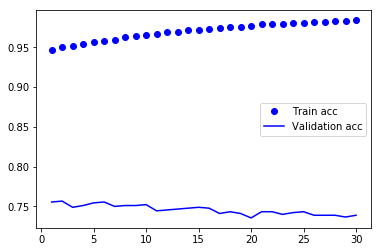

In [204]:


eval_metric(emb_history, 'acc')



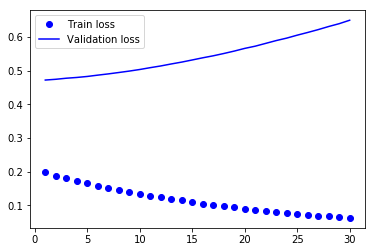

In [205]:
eval_metric(emb_history, 'loss')

In [206]:


emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))



1000/1000 [==============================] - 0s 34us/step
/n
Test accuracy of word embeddings model: 74.60%


# Using pre-trained word embeddings GloVe  
https://www.kaggle.com/bertcarremans/using-word-embeddings-for-sentiment-analysis


In [228]:
GLOVE_DIM = 100  # Number of dimensions of the GloVe word embeddings

glove_file = 'glove.twitter.27B.' + str(GLOVE_DIM) + 'd.txt'
glove_dir = 'data/glove/'
emb_dict = {}

glove=open(glove_dir + glove_file)
for line in glove:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    emb_dict[word] = vector
glove.close()

In [229]:


airline_words = ['airplane', 'airline', 'flight', 'luggage']
for w in airline_words:
    if w in emb_dict.keys():
        print('Found the word {} in the dictionary'.format(w))



Found the word airplane in the dictionary
Found the word airline in the dictionary
Found the word flight in the dictionary
Found the word luggage in the dictionary


In [230]:


emb_matrix = np.zeros((NB_WORDS, GLOVE_DIM))

for w, i in tk.word_index.items():
    # The word_index contains a token for all words of the training data so we need to limit that
    if i < NB_WORDS:
        vect = emb_dict.get(w)
        # Check if the word from the training data occurs in the GloVe word embeddings
        # Otherwise the vector is kept with only zeros
        if vect is not None:
            emb_matrix[i] = vect
    else:
        break



In [231]:
glove_model = models.Sequential()
glove_model.add(layers.Embedding(NB_WORDS, GLOVE_DIM, input_length=MAX_LEN))
glove_model.add(layers.Flatten())
glove_model.add(layers.Dense(2, activation='softmax'))
glove_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 41, 100)           1000000   
_________________________________________________________________
flatten_9 (Flatten)          (None, 4100)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 8202      
Total params: 1,008,202
Trainable params: 1,008,202
Non-trainable params: 0
_________________________________________________________________


In [232]:


glove_model.layers[0].set_weights([emb_matrix])
glove_model.layers[0].trainable = False



In [233]:


glove_history = deep_model(glove_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)



Train on 8100 samples, validate on 900 samples
Epoch 1/30
8100/8100 [==============================] - 1s 81us/step - loss: 0.6331 - acc: 0.6510 - val_loss: 0.5766 - val_acc: 0.7322
Epoch 2/30
8100/8100 [==============================] - 0s 8us/step - loss: 0.5430 - acc: 0.7488 - val_loss: 0.5394 - val_acc: 0.7367
Epoch 3/30
8100/8100 [==============================] - 0s 8us/step - loss: 0.5073 - acc: 0.7664 - val_loss: 0.5212 - val_acc: 0.7300
Epoch 4/30
8100/8100 [==============================] - 0s 9us/step - loss: 0.4826 - acc: 0.7801 - val_loss: 0.5046 - val_acc: 0.7711
Epoch 5/30
8100/8100 [==============================] - 0s 8us/step - loss: 0.4648 - acc: 0.7869 - val_loss: 0.4976 - val_acc: 0.7589
Epoch 6/30
8100/8100 [==============================] - 0s 11us/step - loss: 0.4523 - acc: 0.7952 - val_loss: 0.4974 - val_acc: 0.7500
Epoch 7/30
8100/8100 [==============================] - 0s 8us/step - loss: 0.4401 - acc: 0.8016 - val_loss: 0.4940 - val_acc: 0.7733
Epoch 8/30
81

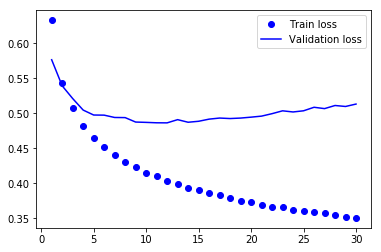

In [234]:


eval_metric(glove_history, 'loss')



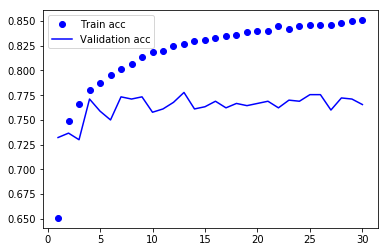

In [235]:


eval_metric(glove_history, 'acc')



In [236]:


glove_results = test_model(glove_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 3)
print('/n')
print('Test accuracy of word glove model: {0:.2f}%'.format(glove_results[1]*100))



1000/1000 [==============================] - 0s 58us/step
/n
Test accuracy of word glove model: 74.40%


In [239]:


emb_model2 = models.Sequential()
emb_model2.add(layers.Embedding(NB_WORDS, GLOVE_DIM, input_length=MAX_LEN))
emb_model2.add(layers.Flatten())
emb_model2.add(layers.Dense(2, activation='softmax'))
emb_model2.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 41, 100)           1000000   
_________________________________________________________________
flatten_11 (Flatten)         (None, 4100)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 8202      
Total params: 1,008,202
Trainable params: 1,008,202
Non-trainable params: 0
_________________________________________________________________


In [240]:


emb_history2 = deep_model(emb_model2, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)



Train on 8100 samples, validate on 900 samples
Epoch 1/30
8100/8100 [==============================] - 1s 80us/step - loss: 0.6784 - acc: 0.5779 - val_loss: 0.6494 - val_acc: 0.7078
Epoch 2/30
8100/8100 [==============================] - 0s 11us/step - loss: 0.6077 - acc: 0.7863 - val_loss: 0.5872 - val_acc: 0.7544
Epoch 3/30
8100/8100 [==============================] - 0s 12us/step - loss: 0.5249 - acc: 0.8314 - val_loss: 0.5301 - val_acc: 0.7700
Epoch 4/30
8100/8100 [==============================] - 0s 11us/step - loss: 0.4477 - acc: 0.8591 - val_loss: 0.4910 - val_acc: 0.7744
Epoch 5/30
8100/8100 [==============================] - 0s 12us/step - loss: 0.3852 - acc: 0.8769 - val_loss: 0.4652 - val_acc: 0.7778
Epoch 6/30
8100/8100 [==============================] - 0s 12us/step - loss: 0.3310 - acc: 0.8956 - val_loss: 0.4483 - val_acc: 0.7789
Epoch 7/30
8100/8100 [==============================] - 0s 11us/step - loss: 0.2858 - acc: 0.9143 - val_loss: 0.4387 - val_acc: 0.7811
Epoch 8/

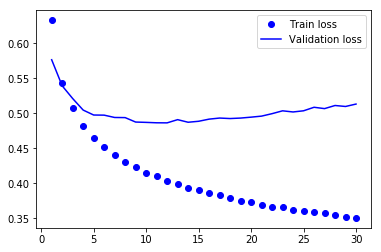

In [241]:


eval_metric(glove_history, 'loss')



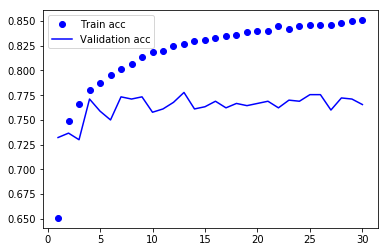

In [242]:


eval_metric(glove_history, 'acc')



In [243]:


emb_results2 = test_model(emb_model2, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 3)
print('/n')
print('Test accuracy of word embedding model 2: {0:.2f}%'.format(emb_results2[1]*100))



1000/1000 [==============================] - 0s 39us/step
/n
Test accuracy of word embedding model 2: 73.70%
